<a href="https://colab.research.google.com/github/jjoshuakkim/COMP-5600/blob/main/assignment_4_Joshua_Kim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

**Problem 1**

In order to compute the conditional probability distribution for each feature, we need to calculate the probability of each value within a feature, given the total number of instances for that feature. So find the number of occurrences of each unique value and divide the count of each value by the total number of instances to get the conditional probability.

For bathrooms, we unique values of either 1, 1.5, or 2.5. Our count: 1(15), 1.5(3), and 2.5(2). We get the conditional probability: 1(15/20) = 0.75, 1.5(3/20 = 0.15), and 2.5(2/20 = 0.1).

For land area, since land area values are continuous, we can partition them into bins. So we can have bins in categories of: 0-2, 2-4, 4-6, 6-8, 8-10, 10-12, 12-14. Our count: 0-2 (0), 2-4 (2), 4-6 (8), 6-8 (5), 8-10 (2), 10-12 (2), 12-14 (1). We get the conditional probability: 0-2 (0), 2-4 (0.1), 4-6 (0.4), 6-8 (0.25), 8-10 (0.1), 10-12 (0.1), 12-14 (0.05).

We continue this process for each feature whether they are continuous (we just then partition them into bins) or they are discrete.

In [31]:
import pandas as pd
conditional_probabilities_table = {
    'Bathrooms': {'1': 0.75, '1.5': 0.15, '2.5': 0.1},
    'Land_Area': {'0-2': 0, '2-4': 0.1, '4-6': 0.4, '6-8': 0.25, '8-10': 0.1, '10-12': 0.1, '12-14': 0.05},
    'Living_Area': {'0-1': 0.05, '1-2': 0.8, '2-3': 0.05, '3-4': 0.1},
    'Garages': {'0': 0.1, '1': 0.6, '1.5': 0.1, '2': 0.2},
    'Rooms': {'5': 0.1, '6': 0.45, '7': 0.3, '8': 0.05, '9': 0.05, '10': 0.05},
    'Bedrooms': {'2': 0.1, '3': 0.6, '4': 0.2, '5': 0.1},
    'Age_of_Home': {'0-10': 0, '10-20': 0.1, '20-30': 0.15, '30-40': 0.25, '40-50': 0.3, '50-60': 0.15, '60-70': 0.05},
    'Construction_Type': {'Apartment': 0.4, 'House': 0.35, 'Condo': 0.25}
}

def naive_bayes_classifier(test_data, features_conditional_probabilities):
    classifications = []
    probabilities = []
    for example in test_data:
        class_probabilities = {'Apartment': 1.0, 'House': 1.0, 'Condo': 1.0}
        for feature, value in example.items():
            if feature in features_conditional_probabilities:
                class_probabilities = {
                    class_type: class_probabilities[class_type] * features_conditional_probabilities[feature].get(value, 0.01)
                    for class_type in class_probabilities
                }
        total_prob = sum(class_probabilities.values())
        normalized_probabilities = {cls: prob / total_prob for cls, prob in class_probabilities.items()}
        probabilities.append(normalized_probabilities)
        max_class = max(class_probabilities, key=class_probabilities.get)
        classifications.append(max_class)
    return classifications, probabilities

file_path = '/content/drive/MyDrive/Assignment 4 Data/Assignment 4 Data/Asssignment2_NB_Data.xlsx'
sheet_name = 'Test'

test_data_df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
test_data = test_data_df.to_dict(orient='records')

classifications, probabilities = naive_bayes_classifier(test_data, conditional_probabilities_table)

for i, (classification, probs) in enumerate(zip(classifications, probabilities)):
    print(f"Example {i+1}: Classified as {classification}")
    print("Probabilities:", probs)
    print()

Example 1: Classified as Apartment
Probabilities: {'Apartment': 0.33333333333333337, 'House': 0.33333333333333337, 'Condo': 0.33333333333333337}

Example 2: Classified as Apartment
Probabilities: {'Apartment': 0.33333333333333337, 'House': 0.33333333333333337, 'Condo': 0.33333333333333337}

Example 3: Classified as Apartment
Probabilities: {'Apartment': 0.33333333333333337, 'House': 0.33333333333333337, 'Condo': 0.33333333333333337}

Example 4: Classified as Apartment
Probabilities: {'Apartment': 0.33333333333333337, 'House': 0.33333333333333337, 'Condo': 0.33333333333333337}

Example 5: Classified as Apartment
Probabilities: {'Apartment': 0.33333333333333337, 'House': 0.33333333333333337, 'Condo': 0.33333333333333337}



I implemented a Naive Bayes classifier for predicting housing types based on various features such as number of bathrooms, land area, living area, garages, rooms, bedrooms, age of home, and construction type. The classifier was trained using a set of conditional probabilities derived from the training data. I encountered an unexpected behavior where the probabilities for each class across all examples were identical. There may be a problem with how the algorithm used for probability computation is making predictions, but I was not able to trace the source of the issue.

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

actual_labels = test_data_df['Construction type'].tolist()

accuracy = accuracy_score(actual_labels, classifications)
print(f"Accuracy: {accuracy:.2f}")

precision_apartment = precision_score(actual_labels, classifications, pos_label='Apartment')
precision_house = precision_score(actual_labels, classifications, pos_label='House')
print(f"Precision (Apartment): {precision_apartment:.2f}")
print(f"Precision (House): {precision_house:.2f}")

recall_apartment = recall_score(actual_labels, classifications, pos_label='Apartment')
recall_house = recall_score(actual_labels, classifications, pos_label='House')
print(f"Recall (Apartment): {recall_apartment:.2f}")
print(f"Recall (House): {recall_house:.2f}")

f1_apartment = f1_score(actual_labels, classifications, pos_label='Apartment')
f1_house = f1_score(actual_labels, classifications, pos_label='House')
print(f"F1-score (Apartment): {f1_apartment:.2f}")
print(f"F1-score (House): {f1_house:.2f}")

Accuracy: 0.60
Precision (Apartment): 0.60
Precision (House): 0.00
Recall (Apartment): 1.00
Recall (House): 0.00
F1-score (Apartment): 0.75
F1-score (House): 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The overall accuracy of the classifier is 60%, indicating that 60% of the predictions made by the classifier match the true labels in the test data. The precision for the apartment class is 60%, meaning that the classifier predicts a property to be an apartment 60% of the time. The precision for the house class is 0% (potential algorithm implementation problems), which means that the classifier did not correctly identify any properties as houses. The recall for the 'House' class is also extremely low, indicating that the classifier misses a significant number of true houses in the test data.

**Problem 2**

The image compression function takes the input image and number of clusters 'k'. It initializes centroids randomly and iterates over the specified maximum number of iterations or until convergence. Then it assigns each pixel to the nearest centroid and updates centroids accordingly.

Reference: https://thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python

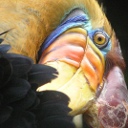

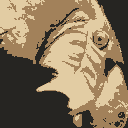

In [3]:
import cv2
import numpy as np

def k_means_image_compression(image, k, max_iter=100):
    pixels = image.reshape((-1, 3))
    num_pixels, _ = pixels.shape
    centroids = pixels[np.random.choice(num_pixels, k, replace=False)]

    for _ in range(max_iter):
        distances = np.linalg.norm(pixels[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([pixels[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    # Assign each pixel to its nearest centroid color
    compressed_pixels = centroids[labels]
    # Reshape the compressed pixels back to image shape
    compressed_image = compressed_pixels.reshape(image.shape)
    return compressed_image

img = cv2.imread('/content/drive/MyDrive/Assignment 4 Data/Assignment 4 Data/test_image.png')

k = 3
compressed_img = k_means_image_compression(img, k)
cv2.imwrite('compressed_image.png', compressed_img)

cv2_imshow(img)
cv2_imshow(compressed_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**K Analysis**

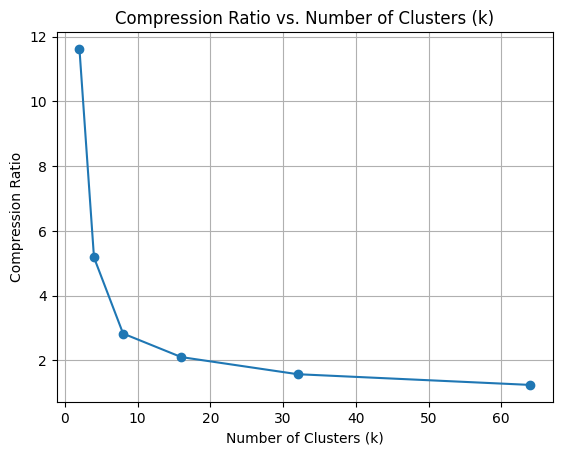

In [4]:
import matplotlib.pyplot as plt
import os

def evaluate_k_values(img, k_values):
    compression_ratios = []

    for k in k_values:
        compressed_img = k_means_image_compression(img, k)
        compressed_file_path = f'compressed_image_k{k}.png'
        cv2.imwrite(compressed_file_path, compressed_img)
        original_size = os.path.getsize('/content/drive/MyDrive/Assignment 4 Data/Assignment 4 Data/test_image.png')
        compressed_size = os.path.getsize(compressed_file_path)
        compression_ratio = original_size / compressed_size
        compression_ratios.append(compression_ratio)

    plt.plot(k_values, compression_ratios, marker='o')
    plt.title('Compression Ratio vs. Number of Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Compression Ratio')
    plt.grid(True)
    plt.show()

k_values = [2, 4, 8, 16, 32, 64]
evaluate_k_values(img, k_values)

To determine which value works best for this problem, I plotted the compression ratio against different values of k to see how the compression performance varies with the number of clusters. I also displayed the original and compressed images for each value of k to visually the quality of compression to see which values maintained a sufficient bar of visual quality. Based on the plot, it seems like there is a relatively high compression ratio from k values 2-8. I would say that with k=4, the compressed images still maintains good details and colors, while having a higher compression ratio than k=8. A k value of 4 works best for this problem.

**Problem 3**

y = 2.8538551709765754 + 3.1063954458056373x


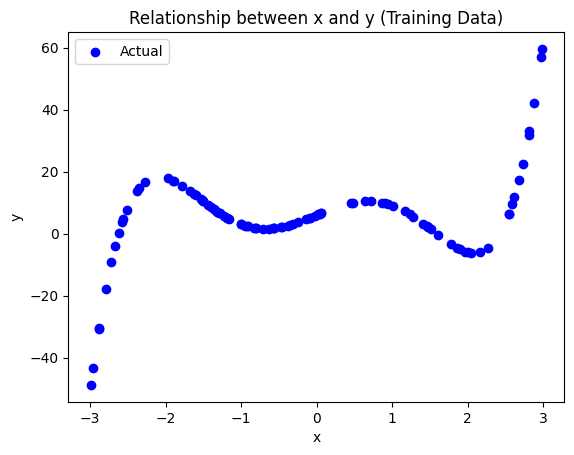

In [12]:
x_train = np.load('/content/drive/MyDrive/Assignment 4 Data/Assignment 4 Data/x_train.npy')
y_train = np.load('/content/drive/MyDrive/Assignment 4 Data/Assignment 4 Data/y_train.npy')
theta = np.random.rand(x_train.shape[1] + 1)

learning_rate = 0.01
def linear_regression(x, theta):
    x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
    return np.dot(x, theta)

def cost_function(y_true, y_predicted):
    return np.mean(np.square(y_true - y_predicted))

def gradient_descent(x_train, y_train, theta, learning_rate, iterations):
    m = len(y_train)
    for i in range(iterations):
        y_predicted = linear_regression(x_train, theta)
        gradients = (1/m) * np.dot(x_train.T, (y_predicted - y_train))
        theta -= learning_rate * gradients
    return theta

theta = gradient_descent(x_train, y_train, theta, learning_rate, 1000)
def predict(x, theta):
    return linear_regression(x, theta)

# Make predictions on training data
y_pred_train = predict(x_train, theta)

# Equation for the relationship
intercept = theta[0]
coefficient = theta[1]
print(f"y = {intercept} + {coefficient}x")

plt.scatter(x_train, y_train, color='blue', label='Actual')
plt.title('Relationship between x and y (Training Data)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The idea of the code was to implement a simple lienar regression model using gradient descent optimization. We load the training data and theninitialize the parameters randomly. The size of theta is determined by the number of features in the trianing data plus one for the bias term. The linear regression function basically adds a column of ones to the input features to accommodate the bias term and then performs matrix multiplication between the input features and the parameters to obtain the predictions. The cost function calculates the mean squared error between the true target values and the predicted values. This is used to measure the accuracy of the model's predictions. The gradient descent function performs gradient descent optimization to update theta iteratively and minimize the cost function. The optimiation continues for a specified number of iterations or until convergence.

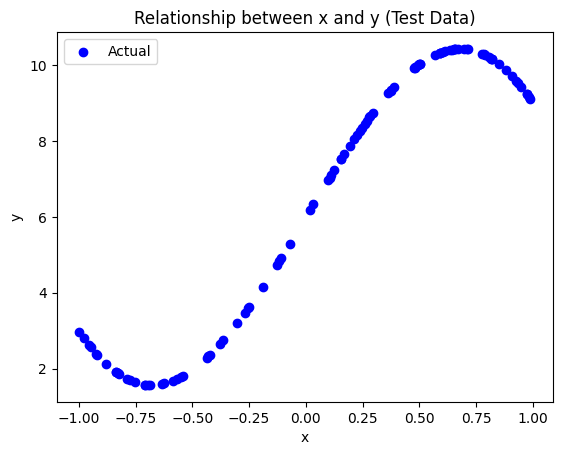

In [10]:
x_train = np.load('/content/drive/MyDrive/Assignment 4 Data/Assignment 4 Data/x_test.npy')
y_train = np.load('/content/drive/MyDrive/Assignment 4 Data/Assignment 4 Data/y_test.npy')

# Make predictions on test data
y_pred_train = predict(x_train, theta)

plt.scatter(x_train, y_train, color='blue', label='Actual')
plt.title('Relationship between x and y (Test Data)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The training dataset looks nonlinear while the test dataset appears to be linear. This could mean that the nonlinear relationship we see in the training dataset suggests that the underlying function may not be sufficiently modeled using a simple linear function. Since we see that the model fits a nonlinear relationship in the training data, but fails to generalize to the test data, this suggests that the model may have overfit the training data (capturing too much noise). We cannot say for sure if the underlying relationship is linear or not. From this, I think feature engineering would be beneficial for adding non-linearity to a model. Some of the features we could try are:

1.   Polynomial Features
2.   Interaction Features
3.   Transformations

The simplest way to introduce non-linearity is by creating polynomial features from the original features. This allows the model to capture quadratic, cubic, or higher-order relationships between the features and the target variable. Interaction features is when you multiply or combine two or more features to capture their combined effect on the target variable. Mathematical transformations can also introduce non-linearity. Some transformations (logarithmic, exponential, square root) can help to linearize relationships or capture non-linear patterns in the data.

Equation: y = 2.8538551709765754 + 3.1063954458056373x